<ipython-input-1-1553414658c0>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2023-01-01", periods=24, freq="M")


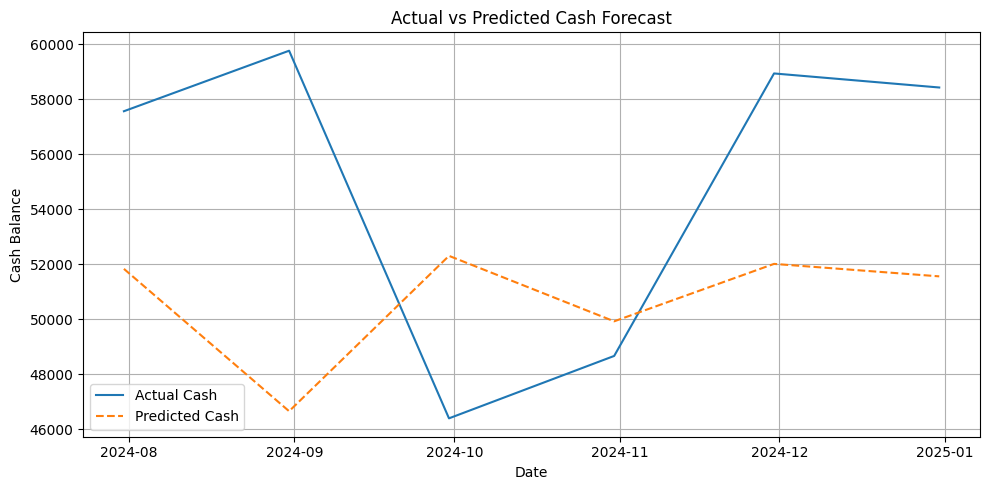

(6635.951666666667,
 np.float64(7489.536141667921),
          date  actual_cash  predicted_cash
 18 2024-07-31        57568        51833.56
 19 2024-08-31        59769        46655.52
 20 2024-09-30        46396        52306.82
 21 2024-10-31        48666        49925.42
 22 2024-11-30        58942        52014.72)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate testing data (replace this with your dataset, this is for educational purposes)
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=24, freq="M")
data = pd.DataFrame({
    'date': dates,
    'cash_balance': np.random.randint(40000, 60000, size=24),
    'accounts_receivable': np.random.randint(8000, 15000, size=24),
    'accounts_payable': np.random.randint(5000, 10000, size=24),
    'payroll': np.random.randint(9000, 11000, size=24),
    'revenue': np.random.randint(25000, 40000, size=24)
})

# Feature Engineering
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter
data['cash_lag_1'] = data['cash_balance'].shift(1)
data.dropna(inplace=True)  # Remove rows with NaN values

# Define features and target
features = ['accounts_receivable', 'accounts_payable', 'payroll', 'revenue', 'month', 'quarter', 'cash_lag_1']
X = data[features]
y = data['cash_balance']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(data['date'].iloc[-len(y_test):], y_test.values, label='Actual Cash')
plt.plot(data['date'].iloc[-len(y_test):], predictions, label='Predicted Cash', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cash Balance')
plt.title('Actual vs Predicted Cash Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return evaluation metrics and sample forecast
forecast_output = pd.DataFrame({
    'date': data['date'].iloc[-len(y_test):],
    'actual_cash': y_test.values,
    'predicted_cash': predictions
})

mae, rmse, forecast_output.head()


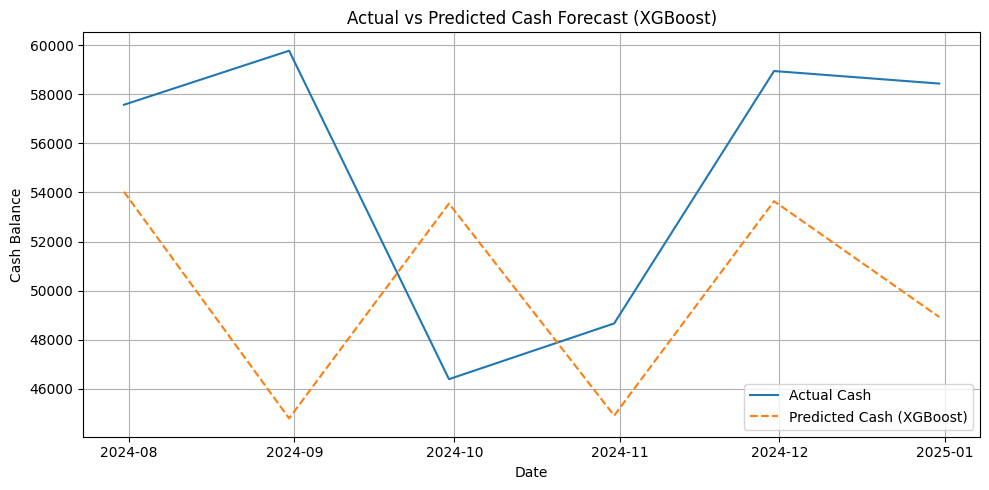

(7369.13720703125,
 np.float64(8368.535355723843),
 '/content/cash_forecast_xgb.xlsx')

In [ ]:
import xgboost as xgb

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'eta': 0.1,
    'seed': 42
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict
xgb_predictions = xgb_model.predict(dtest)

# Evaluation
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Create forecast DataFrame
xgb_forecast_output = pd.DataFrame({
    'date': data['date'].iloc[-len(y_test):],
    'actual_cash': y_test.values,
    'predicted_cash': xgb_predictions
})

# Export forecast to Excel
excel_output_path = '/content/cash_forecast_xgb.xlsx'
xgb_forecast_output.to_excel(excel_output_path, index=False)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(data['date'].iloc[-len(y_test):], y_test.values, label='Actual Cash')
plt.plot(data['date'].iloc[-len(y_test):], xgb_predictions, label='Predicted Cash (XGBoost)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cash Balance')
plt.title('Actual vs Predicted Cash Forecast (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

xgb_mae, xgb_rmse, excel_output_path


In [ ]:
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# (Recreate a simple example plot, replace this with your actual plot code)
import pandas as pd
import numpy as np

dates = pd.date_range(start="2024-01-01", periods=6, freq='M')
actual = np.random.randint(45000, 60000, size=6)
predicted = actual + np.random.randint(-3000, 3000, size=6)

# Plot
plt.figure(figsize=(10,5))
plt.plot(dates, actual, label='Actual Cash')
plt.plot(dates, predicted, label='Predicted Cash', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cash Balance')
plt.title('Actual vs Predicted Cash Forecast (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot as PNG
png_output_path = 'cash_forecast_xgb.png'
plt.savefig(png_output_path)

# Save plot as PDF
pdf_output_path = 'cash_forecast_xgb.pdf'
plt.savefig(pdf_output_path, format='pdf')
plt.close()

# Create PowerPoint presentation
prs = Presentation()
slide_layout = prs.slide_layouts[5]  # Title Only layout
slide = prs.slides.add_slide(slide_layout)

# Add title
title = slide.shapes.title
title.text = "Cash Forecast: Actual vs Predicted (XGBoost)"

# Add the PNG image
slide.shapes.add_picture(png_output_path, Inches(1), Inches(2), width=Inches(8), height=Inches(4))

# Save PowerPoint file
ppt_output_path = 'cash_forecast_xgb.pptx'
prs.save(ppt_output_path)

print("Saved files:")
print(f"PNG: {png_output_path}")
print(f"PDF: {pdf_output_path}")
print(f"PPTX: {ppt_output_path}")


ModuleNotFoundError: No module named 'pptx'